In [1]:
import os, sys
notebook_dir = os.getcwd()
sys.path.append(os.path.abspath(os.path.join(notebook_dir,'..')))

In [2]:
from scripts.data_load import load_data
from scripts.data_visualization import *


In [3]:
tellco_data = load_data("../data/Data/Copy of Week2_challenge_data_source(CSV).csv")

In [4]:
print(tellco_data.head())

      Bearer Id            Start  Start ms              End  End ms  \
0  1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1  1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2  1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3  1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4  1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   

   Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0  1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
1  1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   
2  1361762.0  2.082003e+14   3.376063e+10  3.528151e+13   
3  1321509.0  2.082014e+14   3.375034e+10  3.535661e+13   
4  1089009.0  2.082014e+14   3.369980e+10  3.540701e+13   

      Last Location Name  ...  Youtube DL (Bytes)  Youtube UL (Bytes)  \
0  9.16456699548519E+015  ...          15854611.0           2501332.0   
1                L77566A  ...          20247395.0          19111729.0   

In [ ]:
print(tellco_data.isnull().sum())

In [ ]:
print(tellco_data.dtypes)

Handset Type
Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: count, dtype: int64


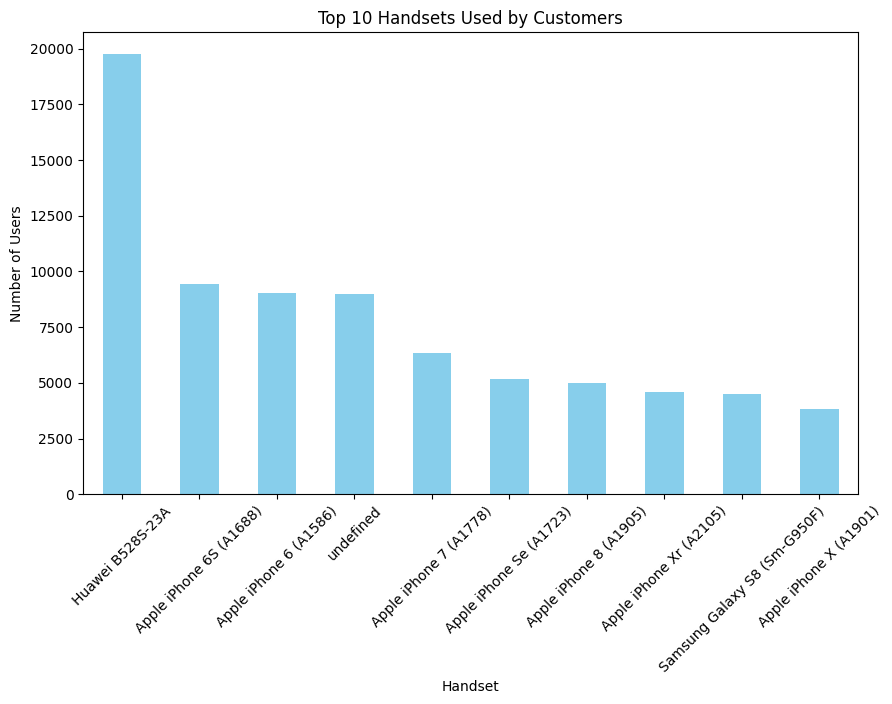

In [5]:
top_handsets = tellco_data['Handset Type'].value_counts().head(10)

print(top_handsets)

plot_visual(top_handsets, 'Handset', 'Number of Users', 'Top 10 Handsets Used by Customers', plt_kind='bar', plt_color='skyblue')

Handset Manufacturer
Apple      59565
Samsung    40839
Huawei     34423
Name: count, dtype: int64


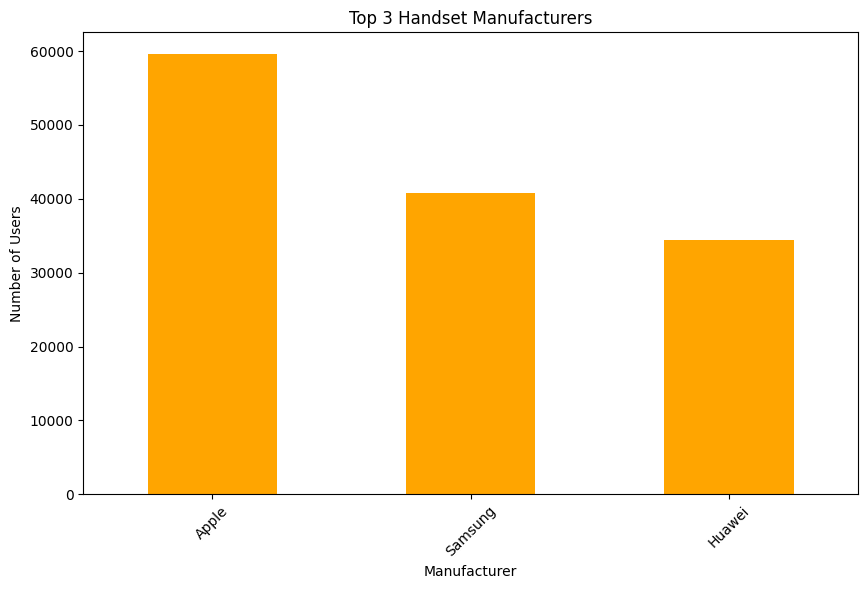

In [6]:
top_manufacturers = tellco_data['Handset Manufacturer'].value_counts().head(3)

print(top_manufacturers)

plot_visual(top_manufacturers, 'Manufacturer', 'Number of Users', 'Top 3 Handset Manufacturers', plt_kind='bar', plt_color='orange')

Handset Type
Apple iPhone 6S (A1688)    9419
Apple iPhone 6 (A1586)     9023
Apple iPhone 7 (A1778)     6326
Apple iPhone Se (A1723)    5187
Apple iPhone 8 (A1905)     4993
Name: count, dtype: int64
Handset Type
Samsung Galaxy S8 (Sm-G950F)    4520
Samsung Galaxy A5 Sm-A520F      3724
Samsung Galaxy J5 (Sm-J530)     3696
Samsung Galaxy J3 (Sm-J330)     3484
Samsung Galaxy S7 (Sm-G930X)    3199
Name: count, dtype: int64
Handset Type
Huawei B528S-23A                  19752
Huawei E5180                       2079
Huawei P20 Lite Huawei Nova 3E     2021
Huawei P20                         1480
Huawei Y6 2018                      997
Name: count, dtype: int64


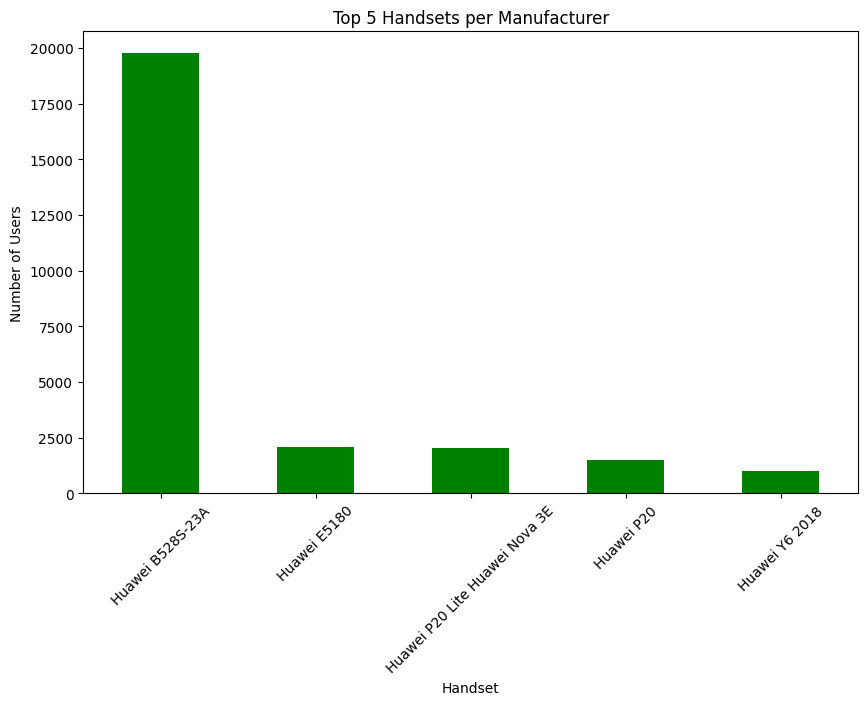

In [7]:
for manufacturer in top_manufacturers.index:
    top_handsets_per_manufacturer = tellco_data[tellco_data['Handset Manufacturer'] == manufacturer]['Handset Type'].value_counts().head(5)
    print(top_handsets_per_manufacturer)
plot_visual(top_handsets_per_manufacturer, 'Handset', 'Number of Users', 'Top 5 Handsets per Manufacturer', plt_kind='bar', plt_color='green')

Task 1.1

In [15]:
user_metrics = tellco_data.groupby('IMSI').agg(
    xDR_sessions=('Bearer Id', 'count'),
    total_duration=('Dur. (ms)', 'sum'),
    total_download=('Total DL (Bytes)', 'sum'),
    total_upload=('Total UL (Bytes)', 'sum'),
    total_data_volume=('Total DL (Bytes)', 'sum')
).reset_index()

user_metrics.head()


,IMSI,xDR_sessions,total_duration,total_download,total_upload,total_data_volume
0,2.040471e+14,1,869844.0,78697597.0,60456049.0,78697597.0
1,2.040808e+14,1,877385.0,194828056.0,37295915.0,194828056.0
2,2.082001e+14,1,86019.0,31376981.0,53794658.0,31376981.0
3,2.082001e+14,1,86254.0,392918313.0,33583272.0,392918313.0
4,2.082001e+14,2,573923.0,961767023.0,71325004.0,961767023.0
